In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import xarray as xr

# IMPORT ALL DATA

In [116]:
# ADCP data
adcp01 = xr.open_dataset('ADCP/adcp01.nc')
adcp02 = xr.open_dataset('ADCP/adcp02.nc')

# ADV data
adv = xr.open_dataset('ADV/adv_qc.nc')

# Temperature data
temp = xr.open_dataset('Temperature/temp_qc.nc')

# Kelp survey data
kelp = pd.read_csv('Kelp/kelp_data_noLR.csv')

# M1 data
m1_ns = xr.open_dataset('M1/m1_ns.nc')
m1_ew = xr.open_dataset('M1/m1_ew.nc')
m1_temp = xr.open_dataset('M1/m1_temp.nc')
m1_wind = xr.open_dataset('M1/m1_wind.nc')

# NBDC 46042 data
nbdc_july = xr.open_dataset('46042_Buoy/nbdc_july.nc')
nbdc_aug = xr.open_dataset('46042_Buoy/nbdc_aug.nc')
nbdc_sept = xr.open_dataset('46042_Buoy/nbdc_sept.nc')

In [33]:
temp_10min

<xarray.Dataset>
Dimensions:      (depth: 7, time: 6985)
Coordinates:
  * time         (time) datetime64[ns] 2022-07-21T22:30:00 ... 2022-09-08T10:...
    dcell        (depth) float64 2.0 4.0 6.0 8.0 9.1 9.4 9.7
Dimensions without coordinates: depth
Data variables:
    Temperature  (time, depth) float64 nan 11.3 11.01 ... 12.38 12.34 12.32

# PLOTTING

### In-situ temp vs wind

In [35]:
# Average the temperature data over 10 minutes to match the wind data
temp_slice = temp.sel(time=slice("2022-07-21T23:00:00.000000000", "2022-09-08T10:31:00.000000000"))
temp_10min = temp_slice.resample(time='10Min').mean()

# Correct the timing of the wind data to fit the temperature
m1_wind_slice = m1_wind.sel(time=slice("2022-07-21T23:00:00.000000000", "2022-09-08T10:31:00.000000000"))

In [32]:
m1_wind_slice

<xarray.Dataset>
Dimensions:                              (time: 74858)
Coordinates:
  * time                                 (time) datetime64[ns] 2022-07-21T23:...
Data variables:
    wind_speed_sonic                     (time) float64 nan nan ... 2.645 3.237
    wind_from_direction_sonic            (time) float64 nan nan ... 143.0 126.1
    wind_speed_windbird                  (time) float64 nan nan ... 0.1137
    wind_from_direction_windbird         (time) float64 nan nan ... 174.9 156.1
    wind_speed_sonic_qc_agg              (time) float64 2.0 2.0 2.0 ... 1.0 1.0
    wind_from_direction_sonic_qc_agg     (time) float64 2.0 2.0 2.0 ... 1.0 1.0
    wind_speed_windbird_qc_agg           (time) float64 2.0 2.0 2.0 ... 1.0 1.0
    wind_from_direction_windbird_qc_agg  (time) float64 2.0 2.0 2.0 ... 1.0 1.0
    z                                    (time) float64 -250.0 -225.0 ... 2.5
Attributes:
    cdm_altitude_proxy:            z
    cdm_data_type:                 TimeSeriesProfile
    cdm_profile_variables:         time
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             webmaster.ndbc@noaa.gov,cencoos_communicat...
    contributor_name:              NOAA National Data Buoy Center (NDBC),Cent...
    contributor_role:              contributor,funder,contributor,processor
    contributor_role_vocabulary:   NERC
    contributor_url:               https://www.ndbc.noaa.gov/,http://cencoos....
    Conventions:                   IOOS-1.2, CF-1.6, ACDD-1.3
    creator_country:               USA
    creator_email:                 webmaster@mbari.org
    creator_institution:           Monterey Bay Aquarium Research Institute (...
    creator_name:                  Monterey Bay Aquarium Research Institute (...
    creator_sector:                nonprofit
    creator_type:                  institution
    creator_url:                   http://www.mbari.org/
    defaultDataQuery:              northward_sea_water_velocity,wind_speed_so...
    featureType:                   TimeSeriesProfile
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    geospatial_vertical_positive:  up
    geospatial_vertical_units:     m
    history:                       Downloaded from Monterey Bay Aquarium Rese...
    id:                            20716
    infoUrl:                       https://sensors.ioos.us/#metadata/20716/st...
    institution:                   Monterey Bay Aquarium Research Institute (...
    license:                       The data may be used and redistributed for...
    naming_authority:              com.axiomdatascience
    platform:                      buoy
    platform_name:                 M1 Mooring Real-Time Data, Monterey Bay, CA
    platform_vocabulary:           http://mmisw.org/ont/ioos/platform
    processing_level:              Level 2
    publisher_country:             USA
    publisher_email:               webmaster@mbari.org
    publisher_institution:         Monterey Bay Aquarium Research Institute (...
    publisher_name:                Monterey Bay Aquarium Research Institute (...
    publisher_sector:              nonprofit
    publisher_type:                institution
    publisher_url:                 http://www.mbari.org/
    references:                    http://www.mbari.org/oasis/index.html,http...
    sourceUrl:                     https://dods.mbari.org/opendap/data/ssdsda...
    standard_name_vocabulary:      CF Standard Name Table v72
    station_id:                    20716
    summary:                       Timeseries data from 'M1 Mooring Real-Time...
    time_coverage_end:             2022-09-09T06:51:00Z
    time_coverage_start:           2022-07-21T07:00:00Z
    title:                         M1 Mooring Real-Time Data, Monterey Bay, CA
    wmo_platform_code:             46092

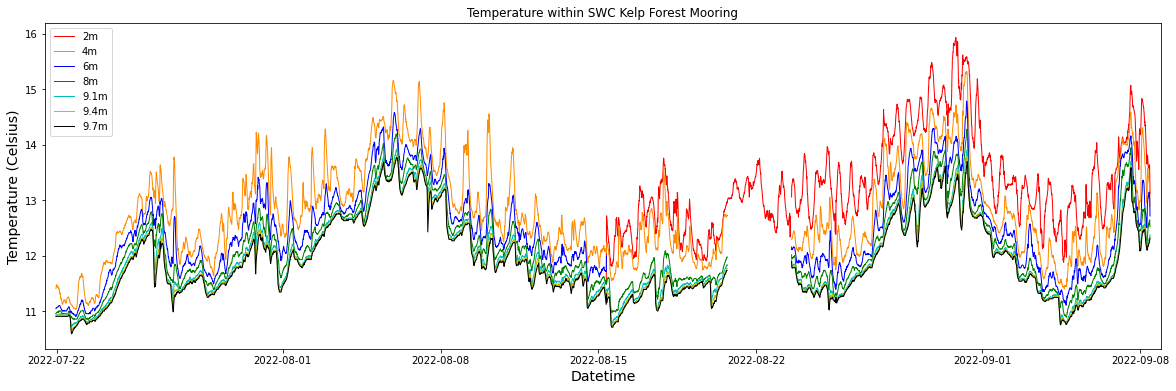

In [542]:
# create figure and axis objects with subplots()
plt.figure(figsize = (20,6))

plt.plot(temp_10min.time, temp_10min.Temperature.isel(depth=0), 'r-', lw = 1)
plt.plot(temp_10min.time, temp_10min.Temperature.isel(depth=1), 'darkorange', lw = 1)
plt.plot(temp_10min.time, temp_10min.Temperature.isel(depth=2), 'b-', lw = 1)
plt.plot(temp_10min.time, temp_10min.Temperature.isel(depth=3), 'g-', lw = 1)
plt.plot(temp_10min.time, temp_10min.Temperature.isel(depth=4), 'c-', lw = 1)
plt.plot(temp_10min.time, temp_10min.Temperature.isel(depth=5), 'y-', lw = 1)
plt.plot(temp_10min.time, temp_10min.Temperature.isel(depth=6), 'k-', lw = 1)

plt.ylabel("Temperature (Celsius)", fontsize=14)

plt.margins(x=.01)
plt.title('Temperature within SWC Kelp Forest Mooring')
plt.legend(['2m','4m','6m','8m','9.1m', '9.4m', '9.7m'])

plt.xlabel("Datetime", fontsize = 14)

plt.savefig('Plots/SWC_complete_temp_timeseries.PNG')

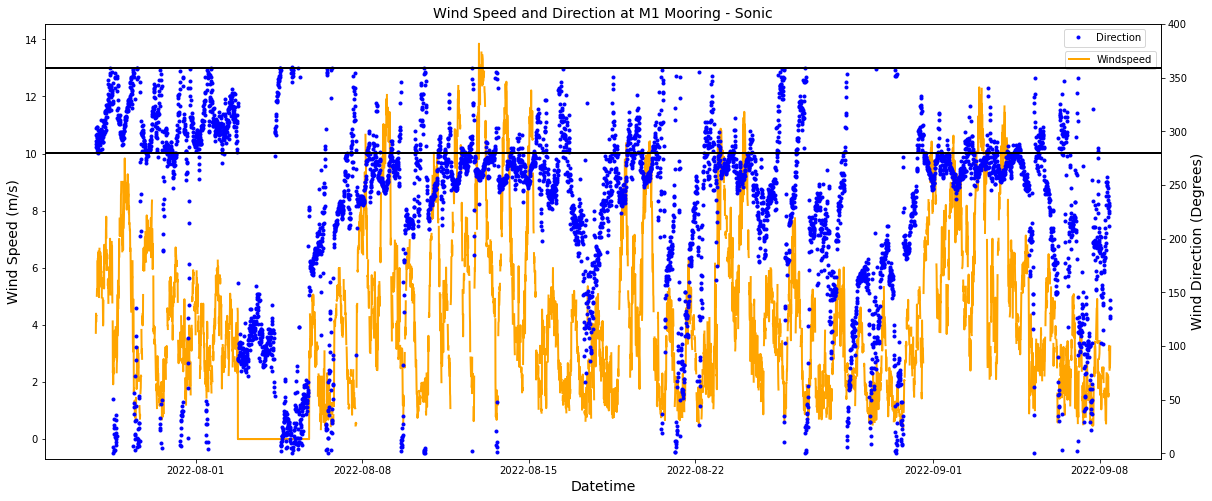

In [541]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (20, 8))

# make a plot

lns1 = ax.plot(m1_wind_slice.time, m1_wind_slice.wind_speed_sonic, 'orange', lw = 2, label='Windspeed')
# set x-axis label
ax.set_xlabel("Datetime", fontsize = 14)
# set y-axis label
ax.set_ylabel("Wind Speed (m/s)", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
lns2 = ax2.plot(m1_wind_slice.time, m1_wind_slice.wind_from_direction_sonic, '.b', lw = 2, label='Direction')
ax2.set_ylim(-5,400)
ax2.set_ylabel("Wind Direction (Degrees)",fontsize=14)


# Solution for having two legends
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax.legend(loc=1, bbox_to_anchor=(1,.95)) #(leg, labs, loc=0)
plt.axhline(y=359, c='black', lw=2)
plt.axhline(y=280, c='black', lw=2)
plt.title('Wind Speed and Direction at M1 Mooring - Sonic', fontsize=14)
plt.legend(bbox_to_anchor=(.99,1))

plt.margins(x=.01, y = .5)
#plt.show()
plt.savefig('Plots/m1_windspeed_+_direction.PNG')

### Velocity and Kelp Data

In [ ]:
adcp01
adcp02
adv
kelp_diam = kelp.filter(like='diam')
kelp_diam

In [195]:
#adv_1min = adv.resample(time='1Min').mean()
#adv_10min = adv.resample(time='10Min').mean()
adv_20min = adv.resample(time='20Min').mean()
adv_direction = np.arctan(adv_20min.North/adv_20min.East) * (180/np.pi)
#nbdc_aug_slice = nbdc_aug.sel(time=slice('2022-08-02T10:40:00.000000000', '2022-08-30T10:50:00.000000000'))

In [337]:
kelp_diam_w1 = kelp_diam.iloc[0:8,:]
w1_mean = kelp_diam_w1.stack().mean()
w1_max = kelp_diam_w1.stack().max()
w1_min = kelp_diam_w1.stack().min()

kelp_diam_w2 = kelp_diam.iloc[8:18,:]
w2_mean = kelp_diam_w2.stack().mean()
w2_max = kelp_diam_w2.stack().max()
w2_min = kelp_diam_w2.stack().min()

kelp_diam_w3 = kelp_diam.iloc[18:33,:]
w3_mean = kelp_diam_w3.stack().mean()
w3_max = kelp_diam_w3.stack().max()
w3_min = kelp_diam_w3.stack().min()

kelp_diam_w4 = kelp_diam.iloc[33:48,:]
w4_mean = kelp_diam_w4.stack().mean()
w4_max = kelp_diam_w4.stack().max()
w4_min = kelp_diam_w4.stack().min()

kelp_diam_w5 = kelp_diam.iloc[48:,:]
w5_mean = kelp_diam_w5.stack().mean()
w5_max = kelp_diam_w5.stack().max()
w5_min = kelp_diam_w5.stack().min()

In [438]:
density_w1 = kelp_diam_w1.count().sum() / 286.28
density_w2 = kelp_diam_w2.count().sum() / 286.28
density_w3 = kelp_diam_w3.count().sum() / 286.28
density_w4 = kelp_diam_w4.count().sum() / 286.28
density_w5 = kelp_diam_w5.count().sum() / 286.28
density_arr = [density_w1, density_w2, density_w3, density_w4, density_w5]

,diam(0),diam(45),diam(90),diam(135),diam(180),diam(225),diam(270),diam(315)
0,0.954930,11.140846,2.300000,19.098593,0.38,3.501409,4.456338,6.684508
1,1.591549,1.909859,2.900000,4.774648,NaN,13.369015,3.023944,3.183099
2,NaN,1.273240,5.900000,1.973521,NaN,4.774648,2.005352,1.909859
3,NaN,2.387324,1.909859,4.774648,NaN,1.909859,2.928451,NaN
4,NaN,3.501409,1.687042,9.549297,NaN,NaN,3.883381,NaN
5,NaN,NaN,1.909859,1.273240,NaN,NaN,NaN,NaN
6,NaN,NaN,1.305071,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,1.655211,NaN,NaN,NaN,NaN,NaN


In [177]:
kelp_mean_arr = np.array([w1_mean, w2_mean, w3_mean, w4_mean, w5_mean])
kelp_max_arr = np.array([w1_max, w2_max, w3_max, w4_max, w5_max])
kelp_min_arr = np.array([w1_min, w2_min, w3_min, w4_min, w5_min])

kelp['Date'] = pd.to_datetime(kelp['Date'])
survey_dates = np.unique(kelp['Date'])

In [174]:
kelp_mean_arr

array([3.99352972, 3.77207146, 3.44814815, 4.1037037 , 2.80204082])

In [175]:
survey_dates

array(['2022-07-26T00:00:00.000000000', '2022-08-01T00:00:00.000000000',
       '2022-08-11T00:00:00.000000000', '2022-08-25T00:00:00.000000000',
       '2022-08-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [381]:
adcp01_10min = adcp01.resample(time='10Min').mean()
adcp02_10min = adcp02.resample(time='10Min').mean()
adv_10min = adv.resample(time='10Min').mean()

In [522]:
adcp02.isel(BinDist=1).resample(time='1Min').mean()

<xarray.Dataset>
Dimensions:      (bin: 47, time: 10096)
Coordinates:
  * time         (time) datetime64[ns] 2022-08-23T11:40:00 ... 2022-08-30T11:...
    BinDist      (bin) float64 0.81 1.06 1.31 1.56 ... 11.56 11.81 12.06 12.31
Dimensions without coordinates: bin
Data variables:
    Pitch        (time) float64 1.414 -0.5838 1.088 ... -0.6158 -0.7418 -1.95
    Roll         (time) float64 -1.429 0.4398 -3.078 -2.637 ... 0.1127 3.108 2.6
    Heading      (time) float64 280.0 280.9 277.5 277.4 ... 265.8 233.8 204.6
    Temperature  (time) float64 12.46 12.41 12.41 12.4 ... 12.79 13.62 14.62
    Depth        (time) float64 10.49 10.47 10.47 10.47 ... 10.1 3.077 0.087
    East         (time) float64 -0.006636 -0.08268 -0.08683 ... -0.05382 -0.176
    North        (time) float64 0.006667 -0.07484 0.07083 ... -0.005765 -0.071
    Vertical     (time) float64 0.05295 0.1017 0.07835 ... -0.09541 -0.071
    Magnitude    (time) float64 0.121 0.1762 0.1522 ... 0.08092 0.1238 0.19
    Direction    (time) float64 195.0 221.8 215.6 142.7 ... 207.6 235.9 248.0
    Correlation  (time) float64 117.5 115.2 118.0 125.1 ... 123.2 120.0 110.0

In [528]:
fixed_adcp02 = adcp02.isel(BinDist=1).sel(time=slice('2022-08-23T12:00:00.000000000', '2022-08-30T11:50:00.000000000'))

In [529]:
adcptot = xr.concat([adcp01, fixed_adcp02], dim='time')
adcptot_1min = adcptot.resample(time='1Min').mean()
#adcptot_10min = adcptot.resample(time='10Min').mean()

In [530]:
fixed_adcptot_1min = adcptot_1min.isel(BinDist=1).sel(time=slice('2022-07-21T16:00:00.000000000', '2022-08-30T11:50:00.000000000'))
#fixed_adcptot_10min = adcptot_10min.isel(BinDist=1).sel(time=slice('2022-07-21T16:00:00.000000000', '2022-08-30T11:50:00.000000000'))

In [531]:
adcptot_1min_roll = adcptot_1min.East.isel(BinDist=1).rolling(time=10).mean()

In [393]:
mag_test = np.sqrt(((adcp02_10min.North.isel(BinDist=1))**2) + ((adcp02_10min.East.isel(BinDist=1))**2))
mag_test

<xarray.DataArray (time: 1010)>
array([0.01815319, 0.01007474, 0.04603126, ...,        nan, 0.02699967,
       0.01948469])
Coordinates:
  * time     (time) datetime64[ns] 2022-08-23T11:40:00 ... 2022-08-30T11:50:00

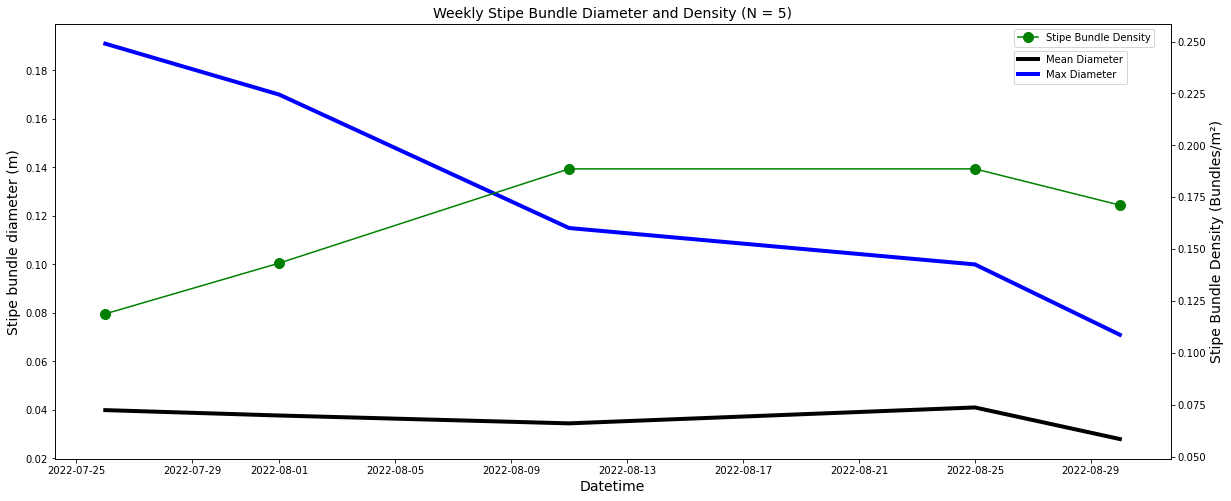

In [492]:
fig,ax = plt.subplots(figsize = (20, 8))

ax.plot(survey_dates, kelp_mean_arr/100, '-k', lw = 4, label= 'Mean Diameter')
ax.plot(survey_dates, kelp_max_arr/100, '-b', lw = 4, label = 'Max Diameter')

ax2=ax.twinx()
ax2.plot(survey_dates, density_arr, '-g', marker = 'o', ms = 10, label = 'Stipe Bundle Density')

ax.legend(loc=1, bbox_to_anchor=(.965,.95))
ax2.legend(bbox_to_anchor=(.99,1))
ax.set_ylabel('Stipe bundle diameter (m)', fontsize = 14)
ax2.set_ylabel('Stipe Bundle Density (Bundles/m\u00b2)', fontsize = 14)
ax.set_xlabel('Datetime', fontsize = 14)
plt.title('Weekly Stipe Bundle Diameter and Density (N = 5)', fontsize = 14)
plt.margins(x=.01, y = 1)



plt.savefig('Plots/kelp_timeseries')

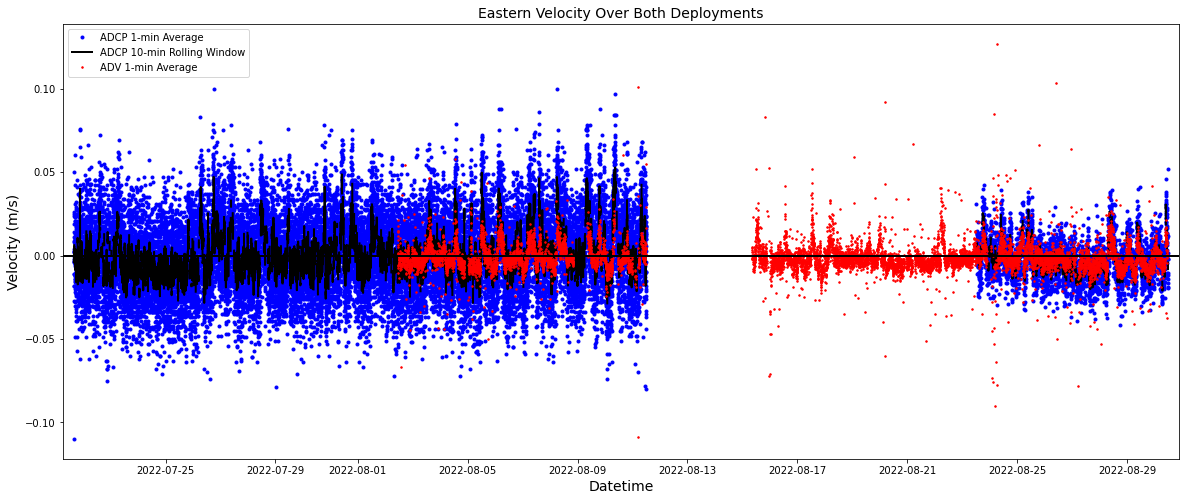

In [534]:
plt.figure(figsize = (20, 8))

#plt.subplot(212)
plt.plot(fixed_adcptot_1min.time, fixed_adcptot_1min.East, 'b.', lw=2)
plt.plot(adcptot_1min_roll.time, adcptot_1min_roll, 'k-', lw=2)
plt.plot(adv_1min.time, adv_1min.East, '.r', ms=3)
#plt.ylim(0,.15)
plt.legend(['ADCP 1-min Average', 'ADCP 10-min Rolling Window', 'ADV 1-min Average'])
plt.ylabel('Velocity (m/s)', fontsize = 14)
plt.xlabel('Datetime', fontsize = 14)
plt.title('Eastern Velocity Over Both Deployments', fontsize = 14)
plt.axhline(y=0, c='black', lw=2)
plt.margins(x=.01)

plt.savefig('Plots/current_timeseries')

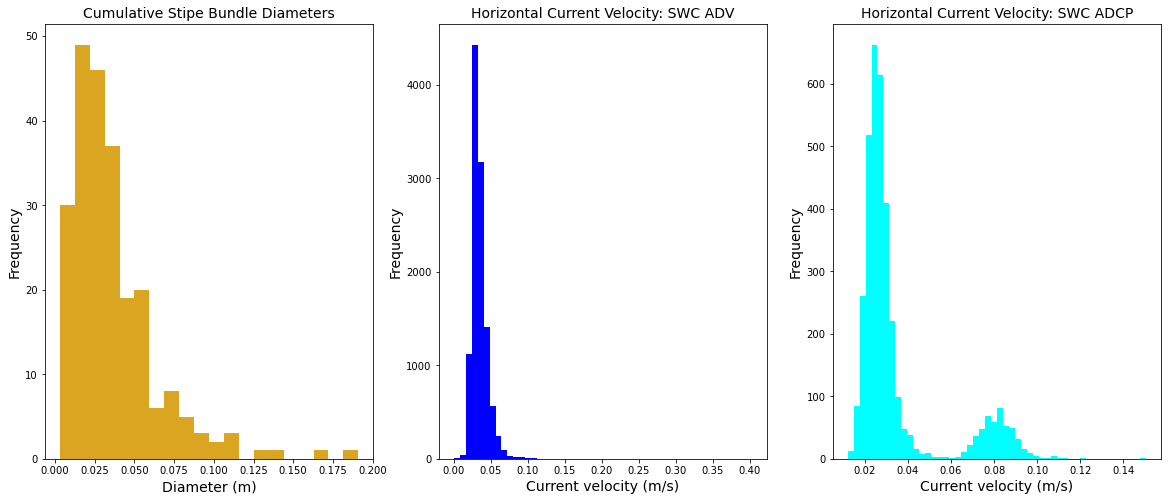

In [416]:
plt.figure(figsize = (20,8))

plt.subplot(131)
plt.hist(kelp_diam.stack()/100, bins  =20, color = 'goldenrod')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Diameter (m)', fontsize = 14)
plt.title('Cumulative Stipe Bundle Diameters', fontsize = 14)

plt.subplot(132)
plt.hist(adv_1min.Magnitude, bins=50, color = 'blue')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Current velocity (m/s)', fontsize = 14)
plt.title('Horizontal Current Velocity: SWC ADV', fontsize = 14)

plt.subplot(133)
plt.hist(adcptot_10min.Magnitude.isel(BinDist=1), bins=50, color = 'cyan')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Current velocity (m/s)', fontsize = 14)
plt.title('Horizontal Current Velocity: SWC ADCP', fontsize = 14)

plt.savefig('Plots/kelp_adv_adcp_histograms')

In [220]:
tmean = temp.mean() # 12.29
kv = .000001225 # kv found on https://www.omnicalculator.com/physics/water-viscosity
Re = 1000 # Re number where turbulence is observed
Vmean = adv.Magnitude.mean() # .0343 m/s

# Re = Vmean * diameter / kv, diameter = Re * kv/ Vmean
diam = ((Re * kv)/Vmean)

In [221]:
diam

<xarray.DataArray 'Magnitude' ()>
array(0.03569219)

### Deployment Specific Data

In [258]:
temp

<xarray.Dataset>
Dimensions:      (depth: 7, time: 69761)
Coordinates:
    dcell        (depth) float64 ...
  * time         (time) datetime64[ns] 2022-07-21T22:39:00 ... 2022-09-08T10:...
Dimensions without coordinates: depth
Data variables:
    Temperature  (depth, time) float64 nan nan nan nan ... 12.32 12.32 12.34
Attributes:
    description:  Temperature of water column over time

In [259]:
adcp01

<xarray.Dataset>
Dimensions:      (BinDist: 47, bin: 47, time: 30038)
Coordinates:
    BinDist      (bin) float64 0.81 1.06 1.31 1.56 ... 11.56 11.81 12.06 12.31
  * time         (time) datetime64[ns] 2022-07-21T15:05:00 ... 2022-08-11T12:...
Dimensions without coordinates: bin
Data variables:
    Pitch        (time) float64 -1.17 1.85 1.57 1.51 ... -0.05 -0.17 -0.34 -1.47
    Roll         (time) float64 -0.92 0.91 2.93 2.92 ... 1.95 2.23 2.53 4.12
    Heading      (time) float64 38.09 56.64 90.48 90.76 ... 88.33 87.34 0.5
    Temperature  (time) float64 15.15 12.1 12.1 12.06 ... 11.91 11.91 11.9 13.48
    Depth        (time) float64 9.526 10.35 10.55 10.56 ... 10.66 10.66 1.12
    East         (time, BinDist) float64 ...
    North        (time, BinDist) float64 ...
    Vertical     (time, BinDist) float64 ...
    Magnitude    (time, BinDist) float64 ...
    Direction    (time, BinDist) float64 ...
    Correlation  (time, BinDist) int64 ...
Attributes:
    description:          Velocity in beam coordinates
    PingsPerEns:          70
    TimePerPing:          00:00.85
    First Ensemble Date:  22/07/21
    First Ensemble Time:  10:30:00.00
    Ensemble Interval:    60.0
    1st Bin Range:        0.81
    Bin Size:             0.25
    RDI binary file:      C:\Users\tconnolly\Desktop\LG_SWC_Depl\ADCP\SWC0100...
    Instrument:           Broadband 1228.8 kHz

In [260]:
# Slice all data into minute intervals
adv01_1min = adv.sel(time=slice('2022-08-02T10:47:00.000000000', '2022-08-11T12:13:00.000000000'))
adv01_1min = adv01_1min.resample(time='1Min').mean()

adcp01_1min = adcp01.sel(time=slice('2022-07-21T22:39:00.000000000', '2022-08-11T12:13:00.000000000')) # '2022-08-08T07:11:00'.000000000'

temp01_1min = temp.sel(time=slice('2022-07-21T22:39:00.000000000', '2022-08-11T12:13:00.000000000'))

In [283]:
# Slice all data into 10-minute intervals
adv01_10min = adv.sel(time=slice('2022-08-02T10:47:00', '2022-08-11T12:13:00.000000000'))
adv01_10min = adv01_10min.resample(time='10Min').mean()

adcp01_10min = adcp01.sel(time=slice('2022-07-21T22:39:00.000000000', '2022-08-11T12:13:00.000000000'))
adcp01_10min = adcp01_10min.resample(time='10Min').mean()
adcp01_east_roll = adcp01_1min.East.isel(BinDist=1).rolling(time=10).mean()

temp01_10min = temp.sel(time=slice('2022-07-21T22:39:00.000000000', '2022-08-11T12:13:00.000000000'))
temp01_10min = temp01_10min.resample(time='10Min').mean()

In [82]:
# Slice all data into 20-minute intervals
adv01_20min = adv.sel(time=slice('2022-08-02T10:46:00', '2022-08-11T11:30:00'))
adv01_20min = adv01_20min.resample(time='20Min').mean()

adcp01_20min = adcp01.sel(time=slice('2022-08-02T10:46:00', '2022-08-11T11:30:00'))
adcp01_20min = adcp01_20min.resample(time='20Min').mean()

temp01_20min = temp.sel(time=slice('2022-08-02T10:46:00', '2022-08-11T11:30:00'))
temp01_20min = temp01_20min.resample(time='20Min').mean()

In [330]:
adcp01_east_roll = adcp01_1min.East.isel(BinDist=1).rolling(time=10).mean()

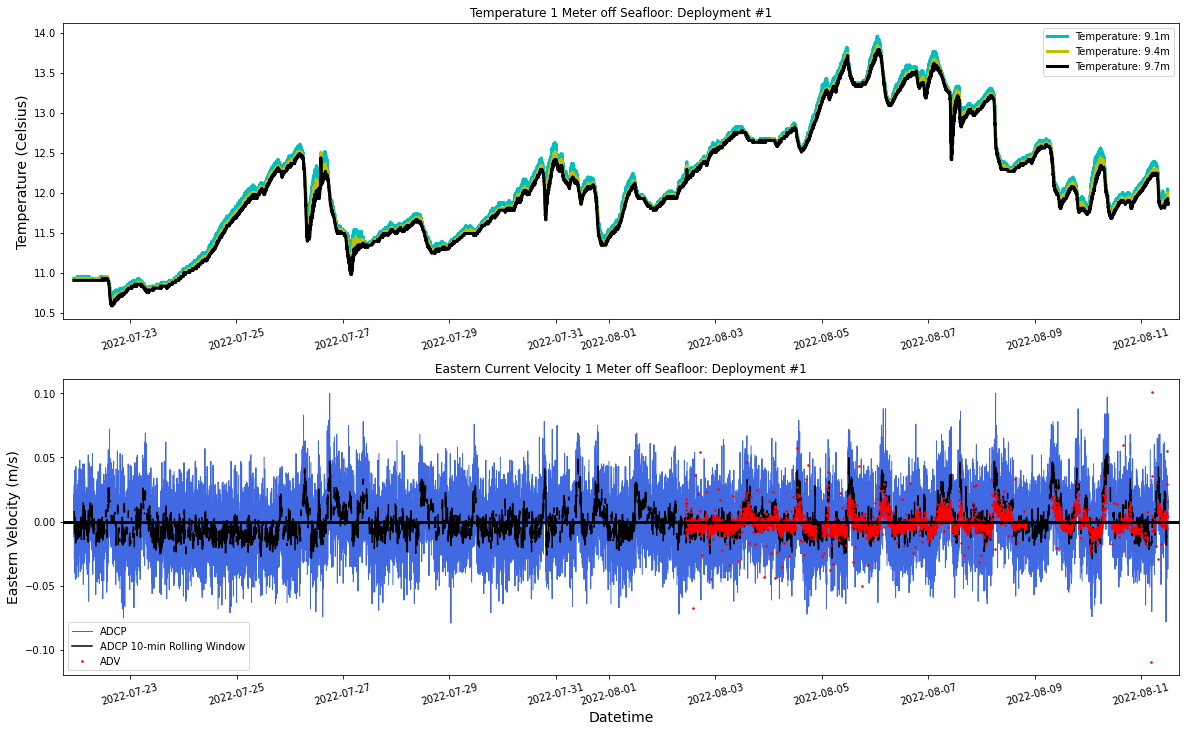

In [366]:
# create figure and axis objects with subplots()
plt.figure(figsize = (20,12))

plt.subplot(211)

plt.plot(temp01_1min.time, temp01_1min.Temperature.isel(depth=4), 'c-', lw = 3)
plt.plot(temp01_1min.time, temp01_1min.Temperature.isel(depth=5), 'y-', lw = 3)
plt.plot(temp01_1min.time, temp01_1min.Temperature.isel(depth=6), 'k-', lw = 3)

plt.title('Temperature 1 Meter off Seafloor: Deployment #1')
plt.xticks(rotation =15)
plt.ylabel("Temperature (Celsius)", fontsize=14)
plt.legend(['Temperature: 9.1m', 'Temperature: 9.4m', 'Temperature: 9.7m'])

plt.margins(x=.01)

plt.subplot(212)
# make a plot with different y-axis using second axis object
plt.plot(adcp01_1min.time, adcp01_1min.East.isel(BinDist=1), color ='royalblue', lw = 1)
plt.plot(adcp01_1min.time, adcp01_east_roll, 'k-', ms = 2)
plt.plot(adv01_1min.time, adv01_1min.East, 'r.', ms = 3)
plt.ylabel("Eastern Velocity (m/s)",fontsize=14)
plt.legend(['ADCP','ADCP 10-min Rolling Window', 'ADV'])
plt.title('Eastern Current Velocity 1 Meter off Seafloor: Deployment #1')
plt.xlabel("Datetime", fontsize = 14)
plt.xticks(rotation =15)
plt.axhline(y=0, c='black', lw=3)

plt.margins(x=.01)

# save the plot as a file
plt.savefig('Plots/Dep1_temp_vs_ew_velocity')

In [343]:
# Above data coincides with weeks 2 and 3
# survey_dates[1:3]
kelp_diam_w1_3 = kelp_diam_w2_3.append(kelp_diam_w1)

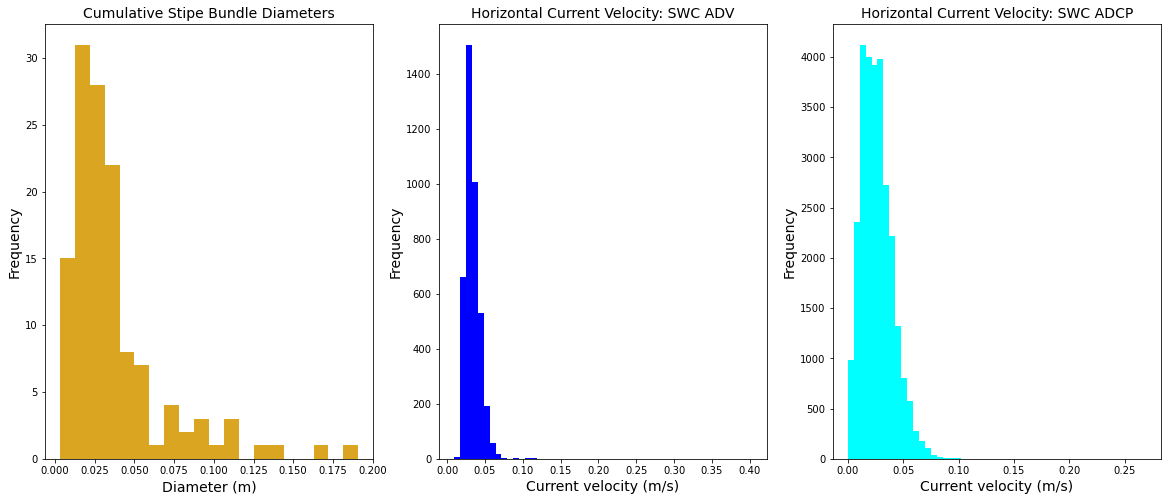

In [419]:
#survey_dates[0:3]
#kelp_diam_w1_3.stack()
plt.figure(figsize = (20,8))

plt.subplot(131)
plt.hist(kelp_diam_w1_3.stack()/100, bins =20, color = 'goldenrod')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Diameter (m)', fontsize = 14)
plt.title('Cumulative Stipe Bundle Diameters', fontsize = 14)

plt.subplot(132)
plt.hist(adv01_1min.Magnitude, bins=50, color = 'blue')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Current velocity (m/s)', fontsize = 14)
plt.title('Horizontal Current Velocity: SWC ADV', fontsize = 14)

plt.subplot(133)
plt.hist(adcp01.Magnitude.isel(BinDist = 1), bins=50, color = 'cyan')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Current velocity (m/s)', fontsize = 14)
plt.title('Horizontal Current Velocity: SWC ADCP', fontsize = 14)

plt.savefig('Plots/Dep1_kelp_current_histograms')

In [362]:
tmean = temp01_1min.mean() # 12.34
#tmean
kv = .0000012233 # kv found on https://www.omnicalculator.com/physics/water-viscosity
Re = 2500 # Re number where turbulence is observed
Vmean = adcp01.Magnitude.isel(BinDist=1).mean() # .0343 m/s
Vsd = adcp01.Magnitude.isel(BinDist=1).std()
Dmean = kelp_diam_w1_3.stack().mean()/100
# Re = Vmean * diameter / kv, diameter = Re * kv/ Vmean
#(Vmean * Dmean)/kv #calculate average Re
((Re * kv)/Vsd) # find diameter 
#((Re * kv)/Dmean) # find velocity


<xarray.DataArray 'Magnitude' ()>
array(0.21453701)

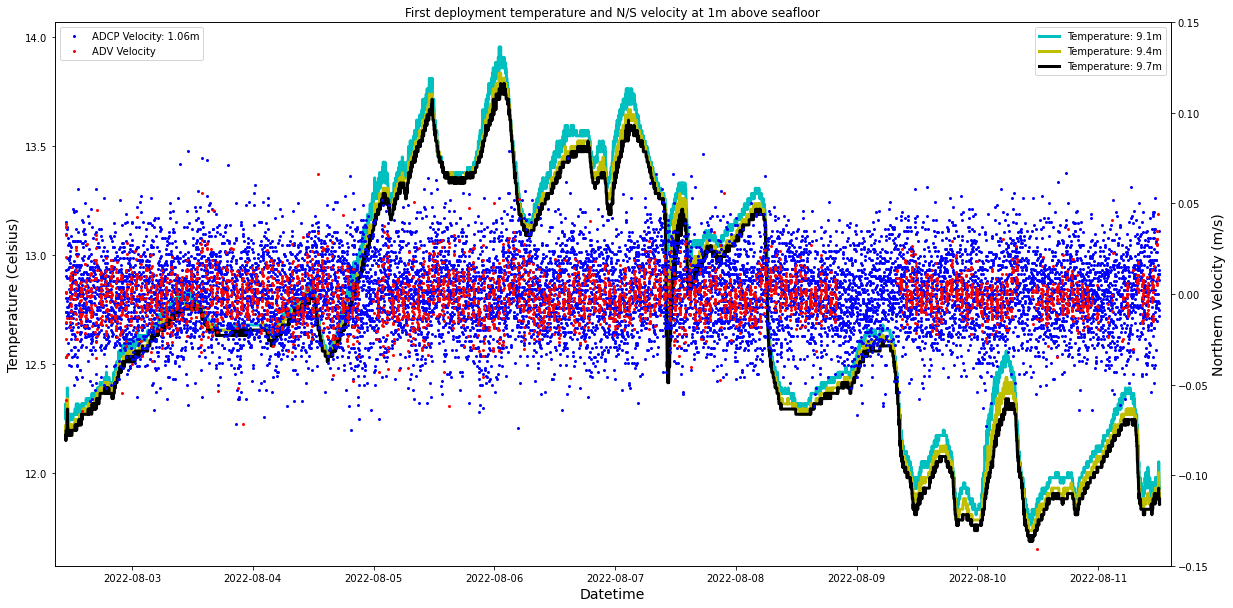

In [62]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (20,10))

# make a plot
#ax.plot(temp01_1min.time, temp01_1min.Temperature.isel(depth=0), 'r-', lw = 3)
#ax.plot(temp01_1min.time, temp01_1min.Temperature.isel(depth=1), 'darkorange', lw = 3)
#ax.plot(temp01_1min.time, temp01_1min.Temperature.isel(depth=2), 'b-', lw = 3)
#ax.plot(temp01_1min.time, temp01_1min.Temperature.isel(depth=3), 'g-', lw = 3)
ax.plot(temp01_1min.time, temp01_1min.Temperature.isel(depth=4), 'c-', lw = 3)
ax.plot(temp01_1min.time, temp01_1min.Temperature.isel(depth=5), 'y-', lw = 3)
ax.plot(temp01_1min.time, temp01_1min.Temperature.isel(depth=6), 'k-', lw = 3)
# set x-axis label
ax.set_xlabel("Datetime", fontsize = 14)
# set y-axis label
ax.set_ylabel("Temperature (Celsius)", fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(adcp01_1min.time, adcp01_1min.North.isel(BinDist=1), 'bo', ms = 2)
ax2.plot(adv01_1min.time, adv01_1min.North, 'ro', ms = 2)
ax2.set_ylabel("Northern Velocity (m/s)",fontsize=14)
ax2.set_ylim([-.15, .15])

plt.title('First deployment temperature and N/S velocity at 1m above seafloor')
ax.legend(['Temperature: 9.1m', 'Temperature: 9.4m', 'Temperature: 9.7m'])
ax2.legend(['ADCP Velocity: 1.06m', 'ADV Velocity'])
plt.margins(x=.01)
plt.show()
# save the plot as a file
fig.savefig('dep1_temperature_ns_velocity')

In [124]:
# Slice all data into minute intervals
adv02_1min = adv.sel(time=slice('2022-08-23T13:00:00', '2022-08-30T10:54:00'))
adv02_1min = adv02_1min.resample(time='1Min').mean()

adcp02_1min = adcp02.sel(time=slice('2022-08-23T13:00:00', '2022-08-30T10:54:00'))
adcp02_1min = adcp02_1min.resample(time='1Min').mean()

temp02_1min = temp.sel(time=slice('2022-08-23T13:00:00', '2022-08-30T10:54:00'))